In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import defaultdict
from src.plotting import plot_sim_evaluation_pv

import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [38]:
from copy import deepcopy

import numpy as np
from acnportal.acnsim import Battery, Linear2StageBattery
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

In [39]:
b1 = Battery(capacity=10, init_charge=0, max_power=7.04)
b2 = Linear2StageBattery(capacity=10, init_charge=0, max_power=7.04)
b3 = Linear2StageBattery(capacity=10, init_charge=0,
                         max_power=7.04, noise_level=0.5)

batteries = {
    "Battery": b1,
    "Linear2StageBattery": b2,
    # "Linear2StageBattery + Noise": b3,
}

In [40]:
socs = {}
rates = {}
pilots = {}

for key, battery in batteries.items():
    print(key)
    
    socs[key] = []
    rates[key] = []
    pilots[key] = []
    
    i = 0
    f = False
    while i < 120:
        i += 1
        battery.charge(battery.max_charging_power * 1000 / 220, 220, 1)

        pilots[key].append(battery.max_charging_power * 1000 / 220)
        rates[key].append(battery.current_charging_power * 1000 / 220)
        socs[key].append(battery._soc)
        
        if battery._soc >= 0.99 and not f:
            print(f"{i} = {key}")
            f = True

Battery
85 = Battery
Linear2StageBattery
120 = Linear2StageBattery


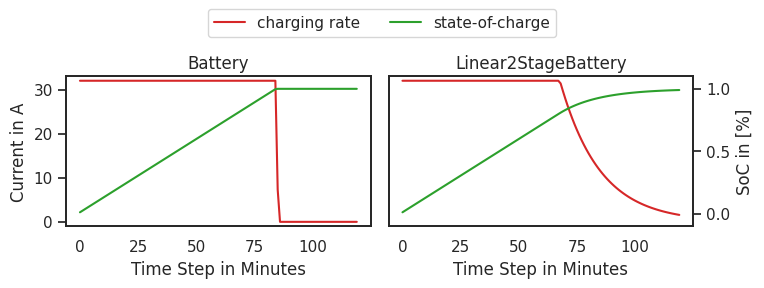

In [41]:
m = 2.6
fig, axs = plt.subplots(
    1,
    len(batteries),
    figsize=(m * 3, m),
    tight_layout=True,
)

# for ax, (l, v) in zip(axs, {"Arrivals": arrivals, "Departures": departures, "Durations": durations}.items()):
#     f = plot_times(times=v.values(), labels=v.keys(), ax=ax)
#     ax.set_title(l, y=-0.3)
#     # ax.set_title(l, y=-0.25)

axs[0].set_ylabel('Current in A')
for i, (ax, (key, battery)) in enumerate(zip(axs, batteries.items())):
    ax.plot(rates[key], label="charging rate", color="tab:red")

    twin = ax.twinx()
    twin.plot(socs[key], label="state-of-charge", color="tab:green")
    twin.set_ylim((-0.1, 1.1))
    ax.set_ylim((-1, 33))

    ax.set_xlabel('Time Step in Minutes')
    ax.set_title(f'{key}')

    if i != len(axs) - 1:
        twin.set_yticklabels([])
        twin.set_yticks([])
    if i != 0:
        ax.set_yticks([])
        pass

twin.set_ylabel("SoC in [%]")

handles, labels = ax.get_legend_handles_labels()
h2, l2 = twin.get_legend_handles_labels()
handles += h2
labels += l2

fig.legend(handles, labels, loc="center", ncols=3, bbox_to_anchor=(0.5, 1.05))
# fig.subplots_adjust(wspace=-0.5)
fig.savefig("batteries.png", dpi=300, bbox_inches="tight")

In [42]:
def plot_battery(battery: Battery):
    battery = deepcopy(battery)

    fig = plt.figure(figsize=(20, 7), dpi=900, tight_layout=True)
    # ax = fig.add_subplot(1, 1, 1)
    ax = host_subplot(111)
    # ax.set_xticks(range(0, 24))

    # heights, bins = np.histogram(df.kWhDelivered, density=True, bins=40)
    # ax.set_xticks(bins.tolist())
    # ax.set_xticklabels(np.around(bins, decimals=2), rotation=45)
    # ax.bar(bins[:-1], height=heights.flatten(), width=[k - i for i, k in pairwise(bins)], edgecolor='black',
    #        label='Energy Delivered', align='edge', color='tab:red')

    pilots, rates, socs = [], [], []

    # while battery._soc < 1:
    i = 0
    while i < 125:
        i += 1
        battery.charge(battery.max_charging_power * 1000 / 220, 220, 1)

        pilots.append(battery.max_charging_power * 1000 / 220)
        rates.append(battery.current_charging_power * 1000 / 220)
        socs.append(battery._soc)

    # ax.plot(pilots, label="pilot signal")
    ax.plot(rates, label="charging rate", color="tab:red")

    twin = ax.twinx()
    twin.plot(socs, label="state-of-charge", color="tab:green")

    twin.set_ylabel("SoC in [%]")

    ax.set_ylabel('current in [A]')
    ax.set_xlabel('timesteps')
    ax.set_title(f'{battery.__class__.__name__}')

    ax.legend()

    # fig.savefig(f'{battery.__class__.__name__}_charging_behavior.png', transparent=True)  # TODO pgf

In [43]:
plot_battery(b1)

In [44]:
plot_battery(b2)